# **Project Build-A-Thon**



---


## Project ID : SPS_PRO_2855

## Project Title : Food Demand Forecasting for Food Delivery Company using IBM Cloud


---



---





---
**By : Vikash Kumar**


---




**Project Description**

A food delivery service has to deal with a lot of perishable raw materials which makes it all, the most important factor for such a company is to accurately forecast daily and weekly demand. Too much inventory in the warehouse means more risk of wastage, and not enough could lead to out-of-stocks - and push customers to seek solutions from your competitors. The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance, the task is to predict the demand for the next 10 weeks.

**AIM**

The main aim of this project is to create an appropriate machine learning model to forecast then number of orders to gather raw materials for next ten weeks. To achieve this, we should know the information about of fulfilment center like area, city etc., and meal information like category of food sub category of food price of the food or discount in particular week. By using this data, we can use any classification algorithm to forecast the quantity for 10 weeks. A web application is built which is integrated with the model built.

**Importing the libraries of dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Data Collection and Data Pre-Processing**

In [10]:
# Loading the dataset to pandas dataframe
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
meal_info = pd.read_csv('/content/meal_info.csv')
center_info = pd.read_csv('/content/fulfilment_center_info.csv')

In [5]:
# Checking 5 rows of the train dataset
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [6]:
# Checking 5 rows of the test dataset
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [7]:
# Getting info about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [8]:
# Description about the train dataset
train['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [9]:
# Checking the null values
train.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

**Merging the datasets**

In [11]:
trainfinal = pd.merge(train, meal_info, on="meal_id", how="outer")
trainfinal = pd.merge(trainfinal, center_info, on="center_id", how="outer")


In [12]:
# Reading the top 5 rows of the updated file
trainfinal.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


**Dropping Columns**

In [13]:
trainfinal = trainfinal.drop(['center_id', 'meal_id'], axis=1)


In [14]:
# Reading the updated dataset
trainfinal.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [15]:
# Displaying the names of columns
cols = trainfinal.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [16]:
# Rearrange the columns
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


**Storing the changes of columns in trainfinal**

In [17]:
trainfinal = trainfinal[cols]
trainfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

**Label-Encoding**

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb1 = LabelEncoder()
trainfinal['center_type'] = lb1.fit_transform(trainfinal['center_type'])

lb2 = LabelEncoder()
trainfinal['category'] = lb1.fit_transform(trainfinal['category'])

lb3 = LabelEncoder()
trainfinal['cuisine'] = lb1.fit_transform(trainfinal['cuisine'])

In [20]:
# Reading the top 5 rows of trainfinal dataframe
trainfinal.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [21]:
# Finding rows and columns
trainfinal.shape

(456548, 13)

**Data Visualization**

**Bivariate Analysis**

Text(-19.379999999999995, 0.5, 'Number of Buyers')

<Figure size 864x504 with 0 Axes>

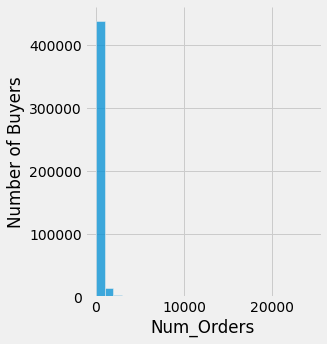

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.displot(trainfinal.num_orders, bins=25)
plt.xlabel("Num_Orders")
plt.ylabel("Number of Buyers")

**Dropping the column “id” and finding the correlation between the columns.**

In [24]:
trainfinal2 = trainfinal.drop(['id'], axis=1)
correlation = trainfinal2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

**Visualization of correlation with heatmap**

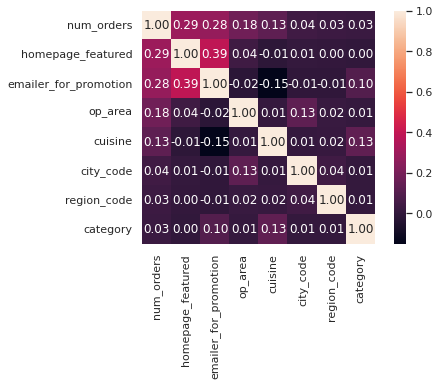

In [29]:
correlation_map = np.corrcoef(trainfinal2[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

**Splitting the data into independent and dependent variables.**

In [33]:
features = columns.drop(['num_orders'])
trainfinal3 = trainfinal[features]
X = trainfinal3.values
y = trainfinal['num_orders'].values

In [34]:
# Reading the top 5 rows of the trainfinal3 dataframe
trainfinal3.head()

,homepage_featured,emailer_for_promotion,op_area,cuisine,city_code,region_code,category
0,0,0,2.0,3,647,56,0
1,0,0,2.0,3,647,56,0
2,0,0,2.0,3,647,56,0
3,0,0,2.0,3,647,56,0
4,0,0,2.0,3,647,56,0


**Splitting the dataset to train and test data**

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X,y ,test_size=0.25, random_state=3)

# Model Building

**Importing different libraries of dependencies**

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

**Model Evaluation**

In [40]:
XG = XGBRegressor()
XG.fit(X_train, y_train)
y_pred = XG.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

[14:52:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 99.36137307977961


In [41]:
LR = LinearRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.97642149015897


In [42]:
L = Lasso()
L.fit(X_train, y_train)
y_pred = L.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 129.4641978173849


In [43]:
EN = ElasticNet()
EN.fit(X_train, y_train)
y_pred = EN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 131.2798855779421


In [44]:
DT = DecisionTreeRegressor()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 62.95018050305687


In [45]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 67.20150554122914


In [46]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)
y_pred = GB.predict(X_val)
y_pred[y_pred<0] = 0
from sklearn import metrics
print('RMSLE:', 100*np.sqrt(metrics.mean_squared_log_error(y_val, y_pred)))

RMSLE: 98.81595242718369


**Saving the model**

In [47]:
import pickle
pickle.dump(DT, open('fdemand.pkl','wb'))

**Predicting The Output Using The Model**

In [48]:
testfinal = pd.merge(test, meal_info, on="meal_id", how="outer")
testfinal = pd.merge(testfinal, center_info, on="center_id", how="outer")
testfinal = testfinal.drop(['meal_id', 'center_id'], axis=1)

tcols = testfinal.columns.tolist()
tcols = tcols[:2] + tcols[8:] + tcols[6:8] + tcols[2:6]
testfinal = testfinal[tcols]

lb1 = LabelEncoder()
testfinal['center_type'] = lb1.fit_transform(testfinal['center_type'])
testfinal['category'] = lb1.fit_transform(testfinal['category'])
testfinal['cuisine'] = lb1.fit_transform(testfinal['cuisine'])

X_test = testfinal[features].values

In [49]:
testfinal.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
category                   int64
cuisine                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
dtype: object

In [51]:
pred = DT.predict(X_test)
pred[pred<0] = 0
submit = pd.DataFrame({'id' : testfinal['id'],'num_orders' : pred})

**Submit the Predicted Model**

In [52]:
submit.to_csv("submission.csv", index=False)

In [53]:
# Checking the description
submit.describe()

,id,num_orders
count,3.257300e+04,32573.000000
mean,1.248476e+06,263.067823
std,1.441580e+05,365.195755
min,1.000085e+06,14.333333
25%,1.123969e+06,64.984444
50%,1.247296e+06,147.637736
75%,1.372971e+06,327.200000
max,1.499996e+06,5778.722222
